# import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir(r"C:\Users\Ramya M N\OneDrive\Documents\DS lab\DS RECORD")
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.layers import MaxPooling2D
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from keras.preprocessing.image import ImageDataGenerator

In [2]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [3]:
cur_path

'C:\\Users\\Ramya M N\\OneDrive\\Documents\\DS lab\\DS RECORD'

# Image Preprocessing for Multiclass Classification


In [4]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)
            #dont do this

In [5]:
data = np.array(data)
labels = np.array(labels)

In [6]:
os.mkdir('trainingtechcopy')

np.save( r"C:\Users\Ramya M N\OneDrive\Documents\DS lab\DS RECORD\Train",data)
np.save(r"C:\Users\Ramya M N\OneDrive\Documents\DS lab\DS RECORD\Meta",labels)

In [7]:
data=np.load(r"C:\Users\Ramya M N\OneDrive\Documents\DS lab\DS RECORD\Train.npy")
labels=np.load(r"C:\Users\Ramya M N\OneDrive\Documents\DS lab\DS RECORD\Meta.npy")

In [8]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [9]:
labels = to_categorical(labels, 43)

# Train-Test Split for Multiclass Classification

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367, 43) (7842, 43)


# Data Augmentation

In [13]:

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Convolutional Neural Network (CNN) Architecture for Multiclass Classification


# MODEL 1

In [69]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(30, 30, 3)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Model Compilation and Training for Multiclass Classification

In [15]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
epochs = 60
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/60
981/981 [==============================] - 71s 72ms/step - loss: 1.5439 - accuracy: 0.6037 - val_loss: 0.2956 - val_accuracy: 0.9317
Epoch 2/60
981/981 [==============================] - 72s 74ms/step - loss: 0.4354 - accuracy: 0.8799 - val_loss: 0.1438 - val_accuracy: 0.9619
Epoch 3/60
981/981 [==============================] - 70s 72ms/step - loss: 0.3022 - accuracy: 0.9163 - val_loss: 0.1087 - val_accuracy: 0.9699
Epoch 4/60
981/981 [==============================] - 72s 73ms/step - loss: 0.2723 - accuracy: 0.9263 - val_loss: 0.0826 - val_accuracy: 0.9784
Epoch 5/60
981/981 [==============================] - 80s 82ms/step - loss: 0.2418 - accuracy: 0.9355 - val_loss: 0.1234 - val_accuracy: 0.9662
Epoch 6/60
981/981 [==============================] - 74s 75ms/step - loss: 0.2227 - accuracy: 0.9407 - val_loss: 0.0736 - val_accuracy: 0.9799
Epoch 7/60
981/981 [==============================] - 75s 77ms/step - loss: 0.2228 - accuracy: 0.9448 - val_loss: 0.0435 - val_accuracy:

In [70]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        2432      
                                                                 
 conv2d_13 (Conv2D)          (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 11, 11, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 9, 9, 64)          18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 7, 7, 64)          36928     
                                                      

# MODEL 3

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

def build_improved_model():
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(30, 30, 3)))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(rate=0.25))
    
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(rate=0.25))
    
    model.add(Flatten())
    model.add(Dense(units=256, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(units=43, activation='softmax'))
    
    return model

# Build the model
improved_model = build_improved_model()


In [16]:
#Compilation of the model
improved_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
epochs = 60
history = improved_model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/60


981/981 [==============================] - 37s 36ms/step - loss: 0.6760 - accuracy: 0.8201 - val_loss: 0.0653 - val_accuracy: 0.9824
Epoch 2/60
981/981 [==============================] - 36s 37ms/step - loss: 0.1106 - accuracy: 0.9662 - val_loss: 0.0368 - val_accuracy: 0.9920
Epoch 3/60
981/981 [==============================] - 37s 38ms/step - loss: 0.0787 - accuracy: 0.9765 - val_loss: 0.0409 - val_accuracy: 0.9893
Epoch 4/60
981/981 [==============================] - 44s 45ms/step - loss: 0.0708 - accuracy: 0.9796 - val_loss: 0.0441 - val_accuracy: 0.9897
Epoch 5/60
981/981 [==============================] - 47s 48ms/step - loss: 0.0646 - accuracy: 0.9812 - val_loss: 0.0380 - val_accuracy: 0.9911
Epoch 6/60
981/981 [==============================] - 39s 40ms/step - loss: 0.0538 - accuracy: 0.9843 - val_loss: 0.0457 - val_accuracy: 0.9902
Epoch 7/60
981/981 [==============================] - 37s 38ms/step - loss: 0.0463 - accuracy: 0.9868 - val_loss: 0.0252 - val_accurac

In [67]:
improved_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 13, 13, 64)        256       
 Normalization)                                                  
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 128)      

# MODEL 2

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

def build_flexible_model(filter_size, kernel_size, pool_size, dropout_rate, dense_units):
    model = Sequential()
    
    # Convolutional layers
    model.add(Conv2D(filters=filter_size, kernel_size=(kernel_size, kernel_size), activation='relu', input_shape=(30, 30, 3)))
    model.add(Conv2D(filters=filter_size, kernel_size=(kernel_size, kernel_size), activation='relu'))
    model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
    model.add(Dropout(rate=dropout_rate))
    
    model.add(Conv2D(filters=2*filter_size, kernel_size=(kernel_size-1, kernel_size-1), activation='relu'))
    model.add(Conv2D(filters=2*filter_size, kernel_size=(kernel_size-1, kernel_size-1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
    model.add(Dropout(rate=dropout_rate))
    
    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(43, activation='softmax'))
    
    return model

# Example usage
filter_size = 20
kernel_size = 3
pool_size = 2
dropout_rate = 0.25
dense_units = 256

flexible_model = build_flexible_model(filter_size, kernel_size, pool_size, dropout_rate, dense_units)
flexible_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 20)        560       
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 20)        3620      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 20)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 20)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 40)        3240      
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 40)        6440      
                                                      

# Training and Validation Accuracy Plot and Loss Plot

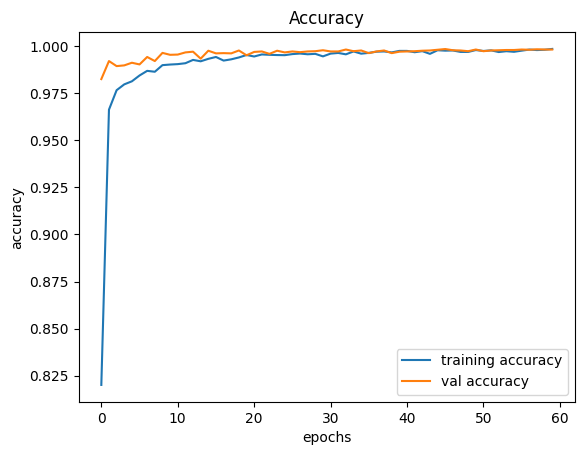

In [19]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

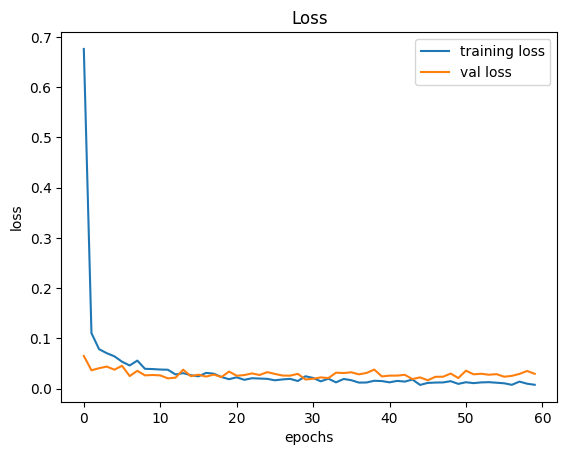

In [20]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Function for Testing Data Loading

In [21]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [22]:
X_test, label = testing('Test.csv')

In [24]:
Y_pred = np.argmax(improved_model.predict(X_test),axis=1)
Y_pred


395/395 [==============================] - 4s 10ms/step


array([16,  1, 38, ...,  1,  7, 10], dtype=int64)

In [71]:
model=improved_model

395/395 [==============================] - 4s 10ms/step


C:\Users\Ramya M N\anaconda3\envs\Ramya\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ramya M N\anaconda3\envs\Ramya\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ramya M N\anaconda3\envs\Ramya\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


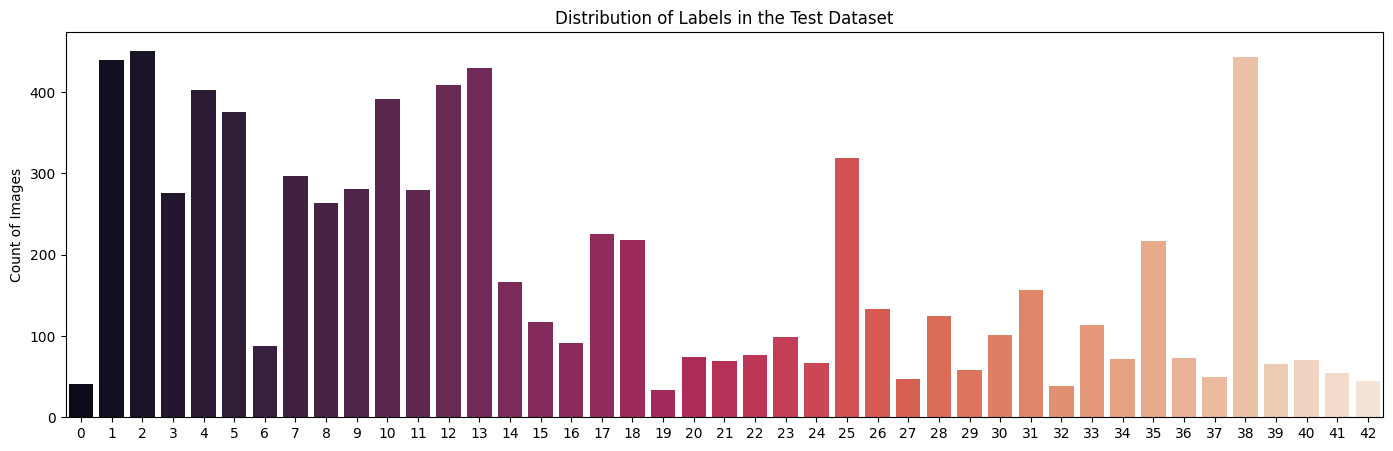

In [25]:

Y_pred_prob = model.predict(X_test)

# Plot the distribution of labels
count_labels = np.sum(y_test, axis=0)
plt.figure(figsize=(17, 5))
plt.ylabel('Count of Images')
sns.barplot(x=np.arange(43), y=count_labels, palette="rocket")
plt.title('Distribution of Labels in the Test Dataset')
plt.show()

# Metrics

In [26]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.979334916864608


In [27]:
from sklearn.metrics import confusion_matrix, classification_report

Y_true = label

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_true, Y_pred)


# Calculate and print classification report (precision, recall, F1-score)
class_report = classification_report(Y_true, Y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.93      1.00      0.96       720
           2       0.99      0.99      0.99       750
           3       1.00      0.94      0.97       450
           4       1.00      0.99      0.99       660
           5       0.95      1.00      0.97       630
           6       1.00      0.90      0.95       150
           7       0.97      0.99      0.98       450
           8       0.98      1.00      0.99       450
           9       1.00      1.00      1.00       480
          10       1.00      0.99      0.99       660
          11       0.99      0.95      0.97       420
          12       1.00      0.98      0.99       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.97      1.00      0.98       210
          16       1.00      1.00      1.00       150
    

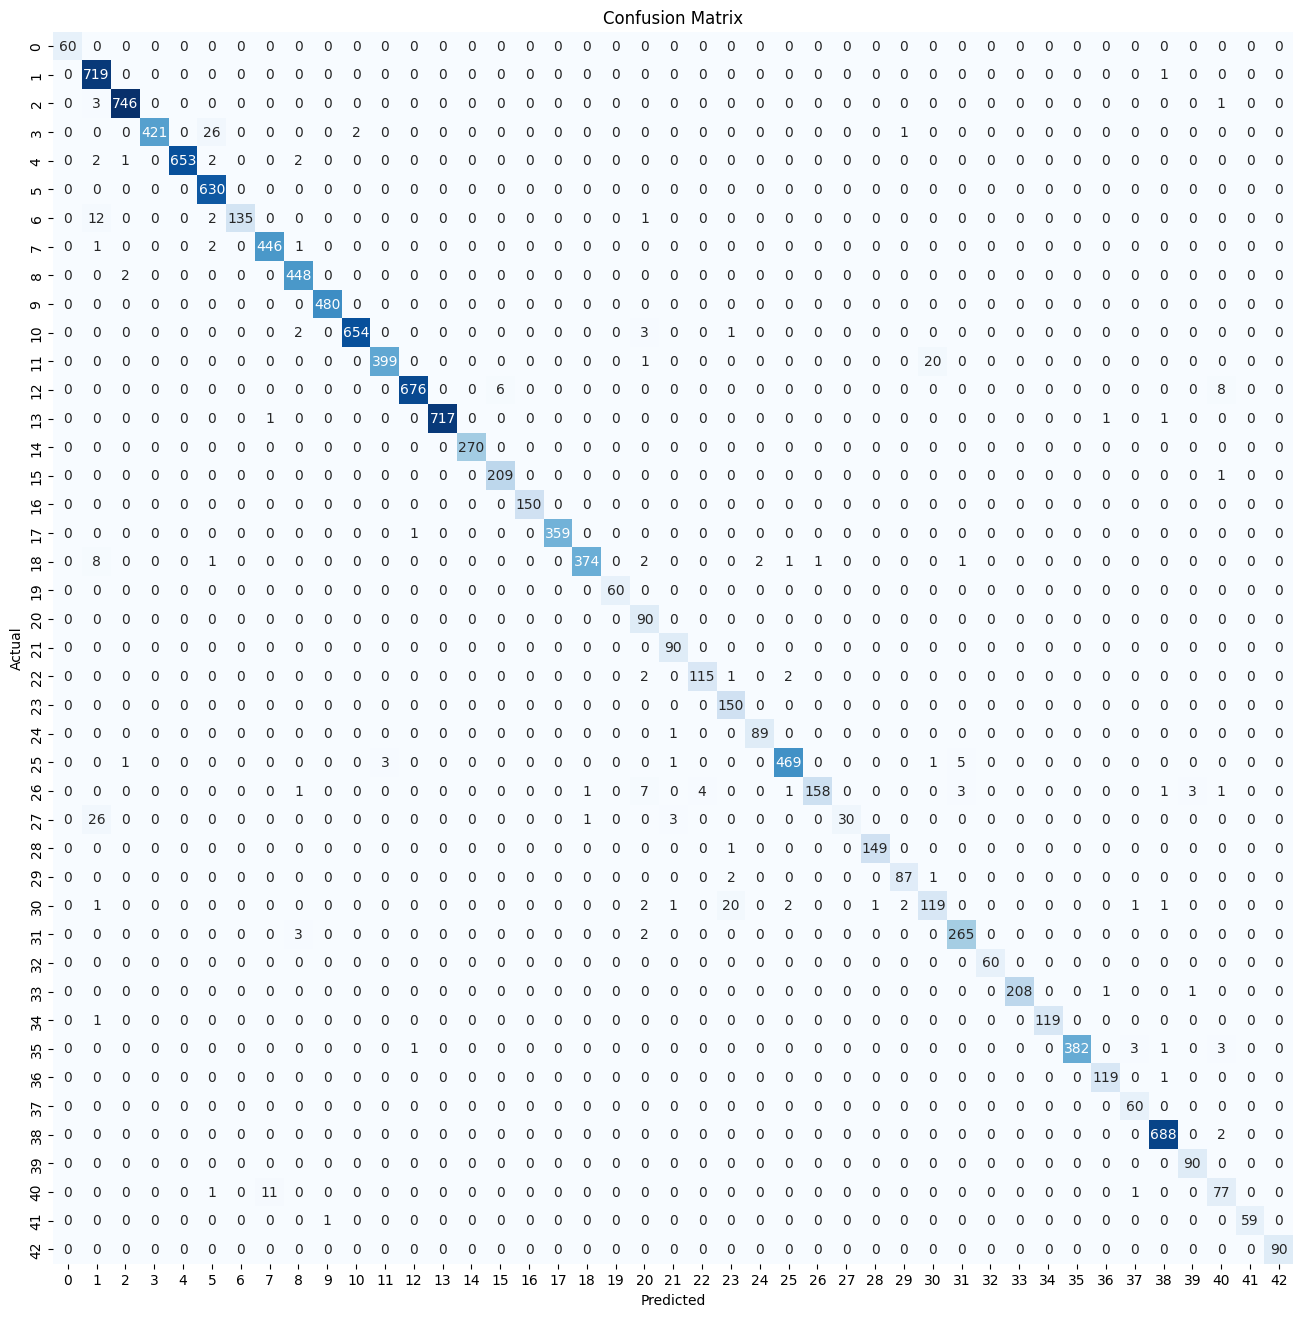

In [28]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 16))
sns.heatmap(conf_matrix, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# save and load the model

In [78]:
# Save the model in the native Keras format
improved_model.save("traffic_sign_model_improved", save_format="tf")


INFO:tensorflow:Assets written to: traffic_sign_model_improved\assets


INFO:tensorflow:Assets written to: traffic_sign_model_improved\assets


In [21]:
import tensorflow as tf

# Load the model
loaded_model = r"C:\Users\Ramya M N\OneDrive\Documents\DS lab\DS RECORD\traffic_sign_model_improved"
model = tf.keras.models.load_model(loaded_model)

In [22]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [23]:
# Messages corresponding to each class
class_messages = {
    0: 'Prepare to slow down to 20 km/h.',
    1: 'Prepare to slow down to 30 km/h.',
    2: 'Prepare to slow down to 50 km/h.',
    3: 'Prepare to slow down to 60 km/h.',
    4: 'Prepare to slow down to 70 km/h.',
    5: 'Prepare to slow down to 80 km/h.',
    6: 'Approaching the end of an 80 km/h speed limit zone.',
    7: 'Prepare to maintain speed at 100 km/h.',
    8: 'Prepare to maintain speed at 120 km/h.',
    9: 'No passing allowed.',
    10: 'No passing for vehicles over 3.5 tons.',
    11: 'Yield the right-of-way at intersections.',
    12: 'Priority road ahead.',
    13: 'Yield to oncoming traffic.',
    14: 'Stop completely at the stop sign.',
    15: 'No vehicles allowed on this road.',
    16: 'Vehicles over 3.5 tons prohibited.',
    17: 'No entry allowed.',
    18: 'General caution, be alert.',
    19: 'Dangerous curve to the left ahead.',
    20: 'Dangerous curve to the right ahead.',
    21: 'Double curve ahead, be cautious.',
    22: 'Bumpy road ahead, drive carefully.',
    23: 'Slippery road ahead, reduce speed.',
    24: 'Road narrows on the right, merge left.',
    25: 'Road work in progress, be prepared to stop.',
    26: 'Traffic signals ahead, obey traffic rules.',
    27: 'Pedestrians likely to be crossing, slow down to 30km/h.',
    28: 'Children crossing, drive with caution speed limited to 30km/h.',
    29: 'Bicycles likely to be crossing, be alert.',
    30: 'Beware of ice or snow on the road.',
    31: 'Wild animals may be crossing the road.',
    32: 'End of speed limit and passing restrictions.',
    33: 'Turn right ahead,want to turn right? right time.',
    34: 'Turn left ahead,want to turn left? right time.',
    35: 'Continue straight ahead only.',
    36: 'Go straight or turn right.',
    37: 'Go straight or turn left.',
    38: 'Keep right of the divider.',
    39: 'Keep left of the divider.',
    40: 'Mandatory roundabout ahead.',
    41: 'End of no passing zone.',
    42: 'End of no passing zone for vehicles over 3.5 tons.'
}

# Testing the model

In [24]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def test_on_img(img_path, loaded_model):
    data = []
    image = Image.open(img_path)
    image = image.resize((30, 30))
    data.append(np.array(image))
    X_test = np.array(data)
    Y_pred = np.argmax(model.predict(X_test), axis=-1)
    return image, Y_pred

1/1 [==============================] - 0s 141ms/step
Predicted traffic sign is: Road narrows on the right


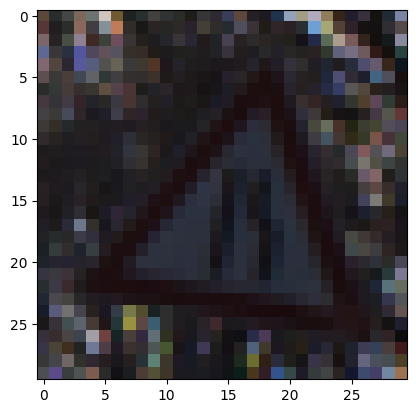

In [25]:
img_path =  r"C:\Users\Ramya M N\OneDrive\Documents\DS lab\DS RECORD\Test\00151.png"
plot, prediction = test_on_img(img_path, model)

print("Predicted traffic sign is:", classes[prediction[0]])

plt.imshow(plot)
plt.show()

# Testing 2 outside the test images

1/1 [==============================] - 0s 33ms/step
Predicted traffic sign class index: 17
Confidence: 1.0


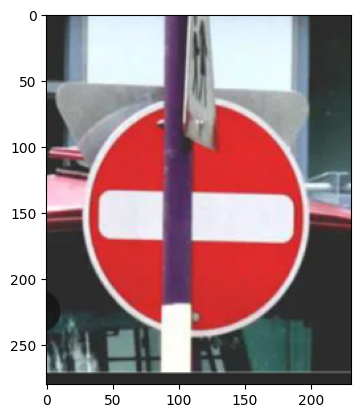

In [27]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def preprocess_image(img_path):
    data = []
    image = Image.open(img_path).convert("RGB")  # Convert to RGB
    image = image.resize((30, 30))
    data.append(np.array(image))
    X = np.array(data)
    return X

def predict_new_image(img_path, loaded_model):
    X = preprocess_image(img_path)
    Y_pred = loaded_model.predict(X)
    predicted_class = np.argmax(Y_pred, axis=-1)
    probability = Y_pred[0][predicted_class[0]]  # Probability of the predicted class
    return predicted_class[0], probability

img_path_new = r"C:\Users\Ramya M N\OneDrive\Pictures\Screenshots\Screenshot 2024-03-02 063325.png"
prediction_new, confidence = predict_new_image(img_path_new, model)

print("Predicted traffic sign class index:", prediction_new)
print("Confidence:", confidence)

image_new = Image.open(img_path_new)
plt.imshow(image_new)
plt.show()


# MESSAGE FOR THE DRIVER

1/1 [==============================] - 0s 33ms/step
Predicted traffic sign is: Turn left ahead
Message to the driver: Turn left ahead,want to turn left? right time.


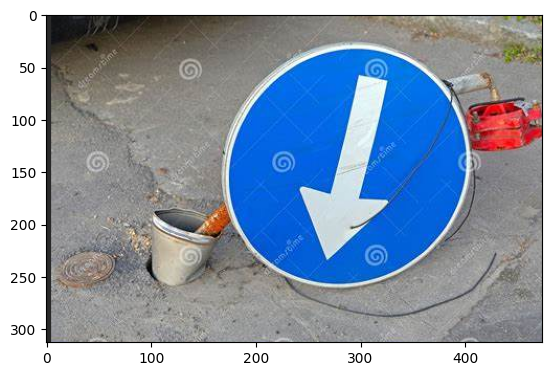

In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def preprocess_image(img_path):
    data = []
    image = Image.open(img_path).convert("RGB")  # Convert to RGB
    image = image.resize((30, 30))
    data.append(np.array(image))
    X = np.array(data)
    return X

def predict_and_generate_message(img_path, loaded_model, classes, class_messages):
    # Predict the image using the model
    prediction = predict_new_image(img_path, loaded_model)

    # Display the predicted traffic sign
    print("Predicted traffic sign is:", classes[prediction])

    # Generate the respective message based on the predicted class
    if prediction in class_messages:
        message_to_driver = class_messages[prediction]
        print("Message to the driver:", message_to_driver)
    else:
        print("Unable to generate a message for the driver.")

    image = Image.open(img_path)
    plt.imshow(image)
    plt.show()

img_path_new =r"C:\Users\Ramya M N\OneDrive\Pictures\Screenshots\Screenshot 2024-03-02 063944.png"
predict_and_generate_message(img_path_new, model, classes, class_messages)

1/1 [==============================] - 0s 35ms/step
Predicted traffic sign is: Children crossing
Message to the driver: Children crossing, drive with caution speed limited to 30km/h.


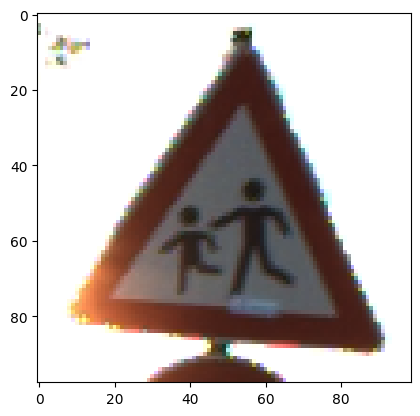

In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def preprocess_image(img_path):
    data = []
    image = Image.open(img_path).convert("RGB")  # Convert to RGB
    image = image.resize((30, 30))
    data.append(np.array(image))
    X = np.array(data)
    return X

def predict_and_generate_message(img_path, loaded_model, classes, class_messages):
    # Predict the image using the model
    prediction = predict_new_image(img_path, loaded_model)

    # Display the predicted traffic sign
    print("Predicted traffic sign is:", classes[prediction])

    # Generate the respective message based on the predicted class
    if prediction in class_messages:
        message_to_driver = class_messages[prediction]
        print("Message to the driver:", message_to_driver)
    else:
        print("Unable to generate a message for the driver.")

    image = Image.open(img_path)
    plt.imshow(image)
    plt.show()

img_path_new =r"C:\Users\Ramya M N\OneDrive\Documents\DS lab\DS RECORD\Test\01579.png"
predict_and_generate_message(img_path_new, model, classes, class_messages)


# OCCLUDED IMAGES

In [12]:
import numpy as np
import cv2


mask_size = (30, 30)


random_mask = np.random.randint(0, 2, mask_size, dtype=np.uint8)


cv2.imwrite("random_mask.png", random_mask * 255)


True

1/1 [==============================] - 0s 35ms/step
Predicted traffic sign is: Stop


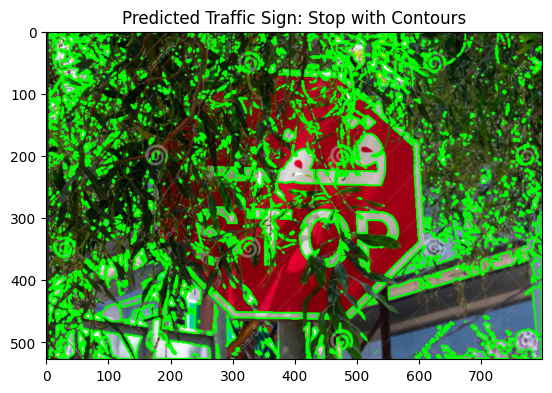

In [13]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

# Function to preprocess an image
def preprocess_image(img_path):
    data = []
    image = Image.open(img_path).convert("RGB")  # Convert to RGB
    image = image.resize((30, 30))
    data.append(np.array(image))
    X = np.array(data)
    return X

# Function to predict the class of a new image
def predict_new_image(img_path, loaded_model):
    X = preprocess_image(img_path)
    Y_pred = np.argmax(loaded_model.predict(X), axis=-1)
    return Y_pred[0]

# Function to add contour lines to an image
def add_contours(img_path, prediction):
    image = cv2.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted Traffic Sign: {classes[prediction]} with Contours")
    plt.show()

# Path to the new image

img_path_new = r"C:\Users\Ramya M N\OneDrive\Pictures\Screenshots\Screenshot 2024-03-02 043010.png"
# Get the prediction
prediction_new = predict_new_image(img_path_new, model)

# Display the prediction and add contours to the image
print("Predicted traffic sign is:", classes[prediction_new])
add_contours(img_path_new, prediction_new)

In [15]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define the classes dictionary
classes_p = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
}

# Number of sequences
num_sequences = 10

# Sequence length
sequence_length = 4

# Generate synthetic sequences and corresponding labels
sequences = []
class_labels = []

for _ in range(num_sequences):
    sequence = np.random.choice(list(classes_p.keys()), size=sequence_length, replace=True)
    label = sequence[-1]  # The label is the last element in the sequence
    sequences.append(sequence)
    class_labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
class_labels = np.array(class_labels)

# Print the generated sequences and labels
print("Generated Sequences:")
print(sequences)
print("Corresponding Labels:")
print(class_labels)

# Define the model
embedding_dim = 8
num_classes = len(classes_p)


Generated Sequences:
[[7 2 0 2]
 [2 8 5 4]
 [2 4 0 7]
 [6 7 4 2]
 [8 7 0 3]
 [4 3 7 1]
 [1 7 2 8]
 [7 1 7 6]
 [0 1 7 7]
 [2 4 8 6]]
Corresponding Labels:
[2 4 7 2 3 1 8 6 7 6]


In [16]:

model1 = Sequential()
model1.add(Embedding(input_dim=num_classes, output_dim=embedding_dim, input_length=sequence_length))
model1.add(LSTM(100))
model1.add(Dense(num_classes, activation='softmax'))

# Compile the model
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model1.fit(sequences, class_labels, epochs=20, batch_size=32, validation_split=0.2)




Epoch 1/20


1/1 [==============================] - 4s 4s/step - loss: 2.1966 - accuracy: 0.1250 - val_loss: 2.1991 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 55ms/step - loss: 2.1936 - accuracy: 0.3750 - val_loss: 2.1985 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 51ms/step - loss: 2.1906 - accuracy: 0.2500 - val_loss: 2.1979 - val_accuracy: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 45ms/step - loss: 2.1875 - accuracy: 0.2500 - val_loss: 2.1973 - val_accuracy: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 61ms/step - loss: 2.1843 - accuracy: 0.2500 - val_loss: 2.1966 - val_accuracy: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 0s 42ms/step - loss: 2.1810 - accuracy: 0.2500 - val_loss: 2.1959 - val_accuracy: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 0s 48ms/step - loss: 2.1775 - accuracy: 0.2500 - val_loss: 2.1952 - val_accuracy: 0.0000e+0

1/1 [==============================] - 1s 500ms/step


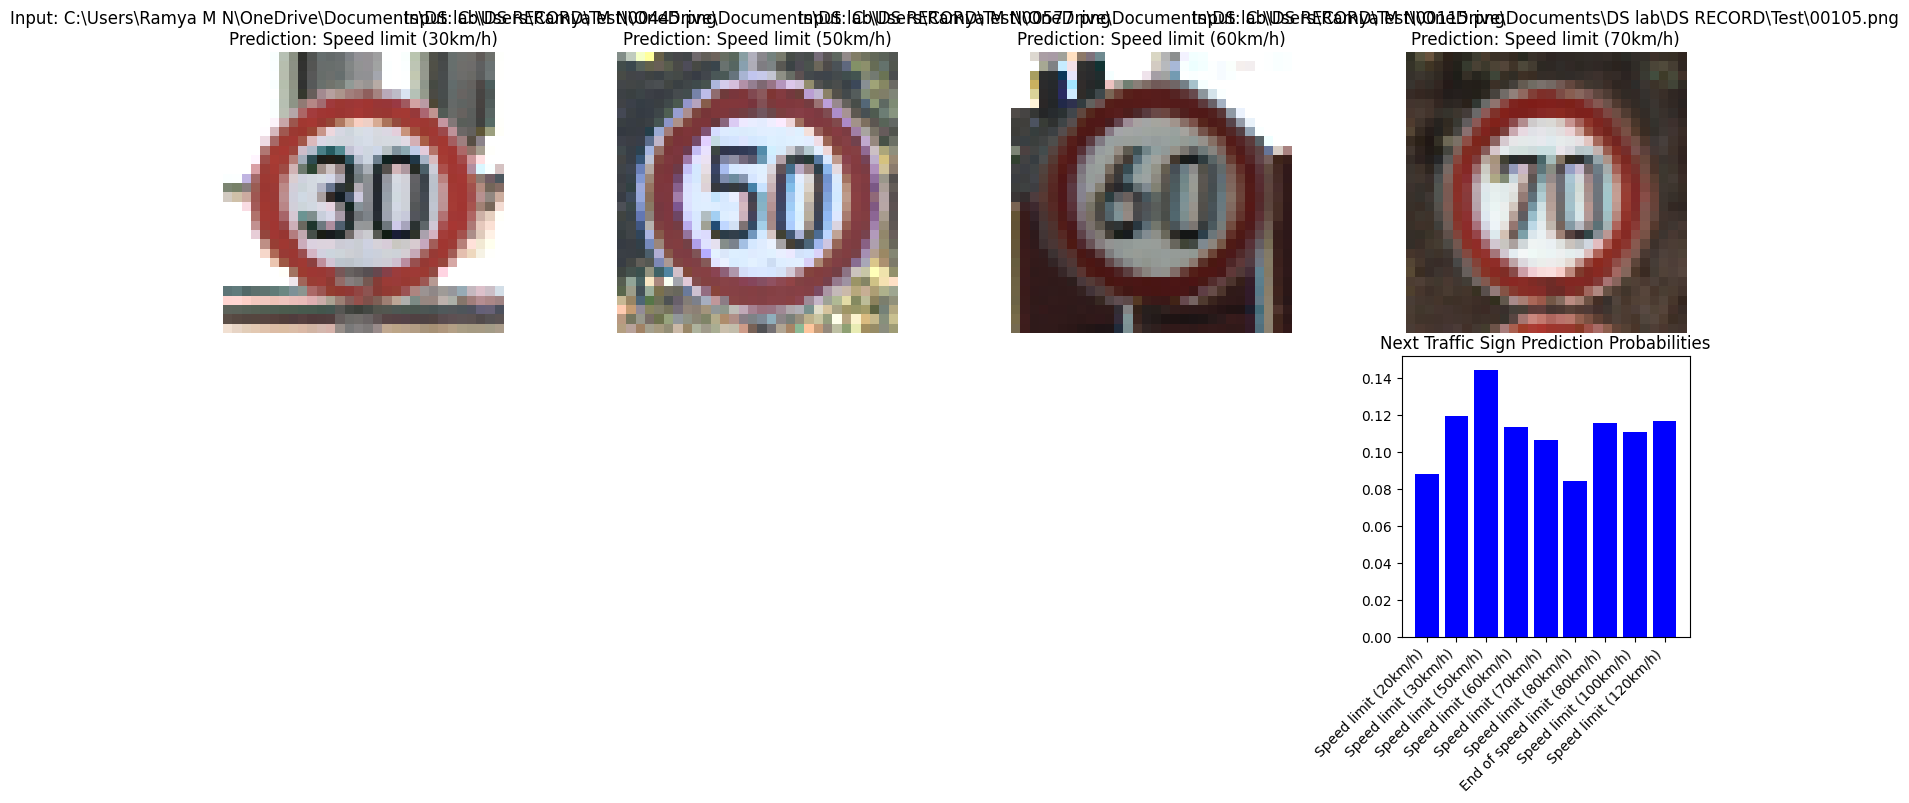

Predicted Next Traffic Sign: Speed limit (50km/h)


In [17]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Step 1: Get the paths of the images
image_paths = [
    r"C:\Users\Ramya M N\OneDrive\Documents\DS lab\DS RECORD\Test\00445.png",
    r"C:\Users\Ramya M N\OneDrive\Documents\DS lab\DS RECORD\Test\00577.png",
    r"C:\Users\Ramya M N\OneDrive\Documents\DS lab\DS RECORD\Test\00115.png",
    r"C:\Users\Ramya M N\OneDrive\Documents\DS lab\DS RECORD\Test\00105.png",  
]

# Step 2: Use the traffic sign recognition model to predict the images
image_predictions = []
predicted_images = []

for path in image_paths:
    img = image.load_img(path, target_size=(30, 30))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Assuming 'model' is your traffic sign recognition model
    prediction = model.predict(img_array)
    image_predictions.append(np.argmax(prediction))  # Use argmax to get the predicted class index
    predicted_images.append(img_array)

classes = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
}

# Create an array of sequence based on predicted traffic sign indices
sequence_array = [classes[idx] for idx in image_predictions]

# Step 4: Use the sequence prediction model to predict the next traffic sign
# Assuming 'model1' is your sequence prediction model
next_traffic_sign_prediction = model1.predict(np.array([image_predictions]))

# Step 5: Display the predicted output along with input images
plt.figure(figsize=(15, 8))

for i, (path, prediction, img_array) in enumerate(zip(image_paths, sequence_array, predicted_images), 1):
    plt.subplot(2, 4, i)
    plt.imshow(img_array[0].astype(np.uint8))
    plt.title(f"Input: {path}\nPrediction: {prediction}")
    plt.axis('off')

plt.subplot(2, 4, 8)
plt.bar(classes.values(), next_traffic_sign_prediction.flatten(), color='blue')
plt.title("Next Traffic Sign Prediction Probabilities")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("Predicted Next Traffic Sign:", classes[np.argmax(next_traffic_sign_prediction)])

# Text to image

1/1 [==============================] - 0s 21ms/step


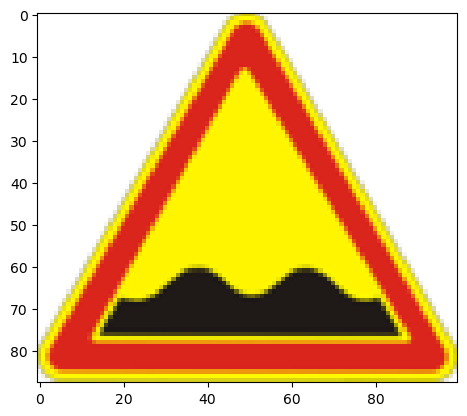

Predicted traffic sign index for Bumpy road: 25
Predicted traffic sign label for Bumpy road: Road work


In [38]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


def preprocess_image(img_path):
    data = []
    image = Image.open(img_path).convert("RGB")  # Convert to RGB
    image = image.resize((30, 30))
    data.append(np.array(image))
    X = np.array(data)
    return X

def predict_image_by_class(class_name, loaded_model, class_to_image_mapping, classes):
    class_number = next((k for k, v in classes.items() if v == class_name), None)
    
    if class_number is None:
        print(f"Class not found: {class_name}")
        return None

    img_path = class_to_image_mapping.get(class_number)

    if img_path is None:
        print(f"Image not found for class: {class_name}")
        return None

    # Predict the class of the image
    X = preprocess_image(img_path)
    predicted_class_index = np.argmax(loaded_model.predict(X), axis=-1)[0]
    predicted_class_label = classes[predicted_class_index]

    # Display the image
    image = Image.open(img_path)
    plt.imshow(image)
    plt.show()

    return predicted_class_index, predicted_class_label

# Specify the class name you want to visualize
class_name_to_visualize ='Bumpy road' # Change this to the desired class label

class_image_list = [
    ("Meta/1.png", 1),
    ("Meta/10.png", 10),
    ("Meta/11.png", 11),
    ("Meta/12.png", 12),
    ("Meta/13.png", 13),
    ("Meta/14.png", 14),
    ("Meta/15.png", 15),
    ("Meta/16.png", 16),
    ("Meta/17.png", 17),
    ("Meta/18.png", 18),
    ("Meta/19.png", 19),
    ("Meta/2.png", 2),
    ("Meta/20.png", 20),
    ("Meta/21.png", 21),
    ("Meta/22.png", 22),
    ("Meta/23.png", 23),
    ("Meta/24.png", 24),
    ("Meta/25.png", 25),
    ("Meta/26.png", 26),
    ("Meta/28.png", 28),
    ("Meta/29.png", 29),
    ("Meta/3.png", 3),
    ("Meta/30.png", 30),
    ("Meta/31.png", 31),
    ("Meta/32.png", 32),
    ("Meta/33.png", 33),
    ("Meta/34.png", 34),
    ("Meta/35.png", 35),
    ("Meta/36.png", 36),
    ("Meta/37.png", 37),
    ("Meta/38.png", 38),
    ("Meta/39.png", 39),
    ("Meta/4.png", 4),
    ("Meta/40.png", 40),
    ("Meta/41.png", 41),
    ("Meta/42.png", 42),
    ("Meta/5.png", 5),
    ("Meta/6.png", 6),
    ("Meta/7.png", 7),
    ("Meta/8.png", 8),
    ("Meta/9.png", 9),
]

class_image_dict = {class_label: rf"C:\Users\Ramya M N\OneDrive\Documents\DS lab\DS RECORD\{image_path}" for image_path, class_label in class_image_list}



# Predict and display the image for the specified class
predicted_class_index, predicted_class_label = predict_image_by_class(
    class_name_to_visualize, model, class_image_dict, classes
)

if predicted_class_index is not None:
    print(f"Predicted traffic sign index for {class_name_to_visualize}: {predicted_class_index}")
    print(f"Predicted traffic sign label for {class_name_to_visualize}: {predicted_class_label}")


1/1 [==============================] - 0s 23ms/step


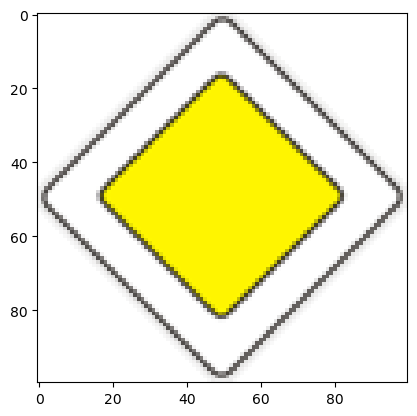

Predicted traffic sign index for 12: 12
Predicted traffic sign label for 12: Priority road


In [39]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def preprocess_image(img_path):
    data = []
    image = Image.open(img_path).convert("RGB")  # Convert to RGB
    image = image.resize((30, 30))
    data.append(np.array(image))
    X = np.array(data)
    return X

def predict_image_by_class(class_name, loaded_model, class_to_image_mapping, classes):
    img_path = class_to_image_mapping.get(class_name)
    
    if img_path is None:
        print(f"Image not found for class: {class_name}")
        return None

    # Predict the class of the image
    X = preprocess_image(img_path)
    predicted_class_index = np.argmax(loaded_model.predict(X), axis=-1)[0]
    predicted_class_label = classes[predicted_class_index]

    # Display the image
    image = Image.open(img_path)
    plt.imshow(image)
    plt.show()

    return predicted_class_index, predicted_class_label

class_image_list = [
    ("Meta/1.png", 1),
    ("Meta/10.png", 10),
    ("Meta/11.png", 11),
    ("Meta/12.png", 12),
    ("Meta/13.png", 13),
    ("Meta/14.png", 14),
    ("Meta/15.png", 15),
    ("Meta/16.png", 16),
    ("Meta/17.png", 17),
    ("Meta/18.png", 18),
    ("Meta/19.png", 19),
    ("Meta/2.png", 2),
    ("Meta/20.png", 20),
    ("Meta/21.png", 21),
    ("Meta/22.png", 22),
    ("Meta/23.png", 23),
    ("Meta/24.png", 24),
    ("Meta/25.png", 25),
    ("Meta/26.png", 26),
    ("Meta/28.png", 28),
    ("Meta/29.png", 29),
    ("Meta/3.png", 3),
    ("Meta/30.png", 30),
    ("Meta/31.png", 31),
    ("Meta/32.png", 32),
    ("Meta/33.png", 33),
    ("Meta/34.png", 34),
    ("Meta/35.png", 35),
    ("Meta/36.png", 36),
    ("Meta/37.png", 37),
    ("Meta/38.png", 38),
    ("Meta/39.png", 39),
    ("Meta/4.png", 4),
    ("Meta/40.png", 40),
    ("Meta/41.png", 41),
    ("Meta/42.png", 42),
    ("Meta/5.png", 5),
    ("Meta/6.png", 6),
    ("Meta/7.png", 7),
    ("Meta/8.png", 8),
    ("Meta/9.png", 9),
]

class_image_dict = {class_label: rf"C:\Users\Ramya M N\OneDrive\Documents\DS lab\DS RECORD\{image_path}" for image_path, class_label in class_image_list}

# Specify the class name you want to visualize
class_name_to_visualize = 12

# Predict and display the image for the specified class
predicted_class_index, predicted_class_label = predict_image_by_class(class_name_to_visualize, model, class_image_dict, classes)

if predicted_class_index is not None:
    print(f"Predicted traffic sign index for {class_name_to_visualize}: {predicted_class_index}")
    print(f"Predicted traffic sign label for {class_name_to_visualize}: {predicted_class_label}")


# Model Summary

In [40]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

# ROC CURVE

395/395 [==============================] - 4s 9ms/step


<Figure size 800x800 with 0 Axes>

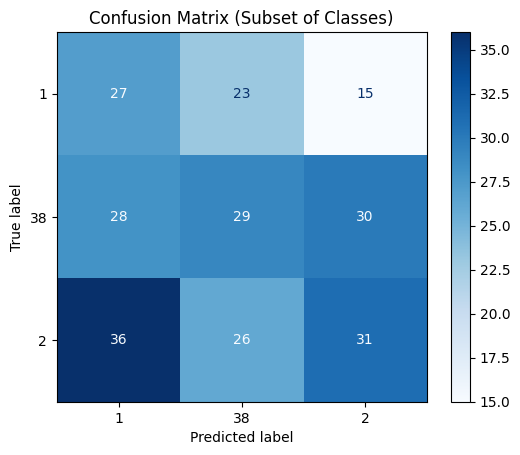

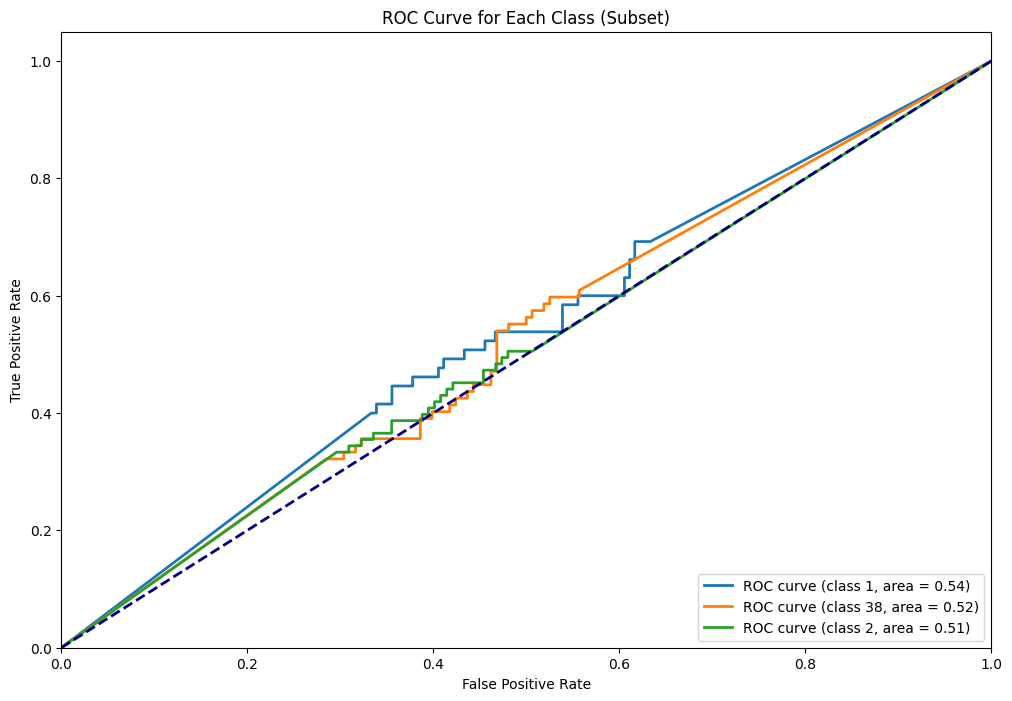

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from itertools import cycle

# Assuming 'model' is your trained model and 'X_test' is your test data
Y_true = np.argmax(y_test, axis=1)
Y_pred_prob = model.predict(X_test)
Y_pred = np.argmax(Y_pred_prob, axis=1)

# Ensure Y_true and Y_pred have the same length
min_length = min(len(Y_true), len(Y_pred))
Y_true = Y_true[:min_length]
Y_pred = Y_pred[:min_length]

# Define the classes you want to include in the subset
class_range = [1,38,2]  # Modify this list as per your requirements

# Create a mask to filter out only the samples where true and predicted labels are in the specified range
mask = np.isin(Y_true, class_range) & np.isin(Y_pred, class_range)

# Get the common index for the subset
common_index = np.where(mask)[0]

# Apply the common index to get the subset of true and predicted labels
Y_true_subset = Y_true[common_index]
Y_pred_subset = Y_pred[common_index]
Y_pred_prob_subset = Y_pred_prob[common_index]

# Compute the confusion matrix for the subset of classes
conf_matrix_subset = confusion_matrix(Y_true_subset, Y_pred_subset, labels=class_range)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix_subset, display_labels=class_range)
plt.figure(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Subset of Classes)")
plt.show()

# Plot the ROC curve for each class in the subset
n_classes = len(class_range)
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(12, 8))
lw = 2

for i in class_range:
    fpr[i], tpr[i], _ = roc_curve(Y_true_subset == i, Y_pred_prob_subset[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=lw, label=f'ROC curve (class {i}, area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class (Subset)')
plt.legend(loc="lower right")
plt.show()


1/1 [==============================] - 0s 32ms/step
Predicted traffic sign: No entry
Predicted speed limit: None
Confidence: 1.0


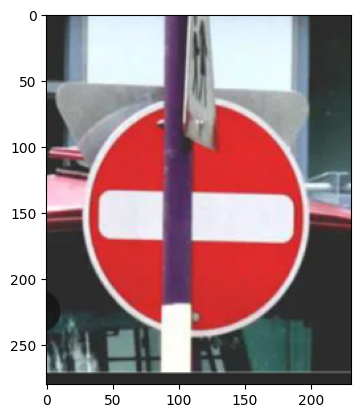

In [28]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Classes of traffic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

def preprocess_image(img_path):
    data = []
    image = Image.open(img_path).convert("RGB")  # Convert to RGB
    image = image.resize((30, 30))
    data.append(np.array(image))
    X = np.array(data)
    return X

def predict_new_image(img_path, loaded_model):
    X = preprocess_image(img_path)
    Y_pred = loaded_model.predict(X)
    predicted_class = np.argmax(Y_pred, axis=-1)
    probability = Y_pred[0][predicted_class[0]]  # Probability of the predicted class
    return predicted_class[0], probability

img_path_new = r"C:\Users\Ramya M N\OneDrive\Pictures\Screenshots\Screenshot 2024-03-02 063325.png"
prediction_new, confidence = predict_new_image(img_path_new, model)

# Get the predicted traffic sign class label
predicted_class_label = classes.get(prediction_new, "Unknown")

# Get the speed limit from the predicted traffic sign class label
speed_limit = None
if "Speed limit" in predicted_class_label:
    speed_limit = predicted_class_label.split("(")[1].split(")")[0]

print("Predicted traffic sign:", predicted_class_label)
print("Predicted speed limit:", speed_limit)
print("Confidence:", confidence)

image_new = Image.open(img_path_new)
plt.imshow(image_new)
plt.show()


# DS PROJECT THE END
